## 

# Midterm Project  <small> Data Bootcamp, Fall 2020 </small>

### 

<div class="alert alert-block alert-success">
    <p class="h4">
        <br>
        <b>Name:</b> Victor Fteha
        <br>
        <br>
        <b>NetID:</b> vf677
        <br>
        <br>
    </p>
</div>

# 

---

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

size = 20
params = {'legend.fontsize': 'large',
          'figure.figsize': (14,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': size}

plt.rcParams.update(params)
plt.style.use('seaborn')
%matplotlib inline

In [2]:
path = '/Users/victorfteha/Desktop/Python/Midterm/DB_MidtermSampleData_Oct20.csv'

df = pd.read_csv(path)

df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,Aon PLC,Financials,2012-01,scientist,Southern Asia,female,38.112310,6.890821e-06,7.201138e-01
1,Aon PLC,Financials,2012-01,scientist,Northern Europe,male,88.158884,1.149815e-02,2.646963e-02
2,Bayer AG,Health Care,2012-01,finance,Northern Africa,male,5.924243,5.437103e-07,7.298315e-07
3,Facebook Inc,Communication,2012-01,engineer,Southern Europe,male,87.174163,8.733023e-01,4.910197e-05
4,"Cisco Systems, Inc.",Information Technology,2012-01,engineer,Central America and the Caribbean,male,599.260133,1.995257e+01,7.939743e+00
...,...,...,...,...,...,...,...,...,...
2301805,Blackstone Group L.P.,Industrials,2019-05,empty,South America,male,35.176800,7.994499e-03,1.039289e-02
2301806,Morgan Stanley,Financials,2019-11,empty,Eastern Europe,male,120.728768,3.733244e+00,3.983346e+00
2301807,Hewlett Packard Enterprise Company,Information Technology,2020-01,empty,South-Eastern Asia,male,331.677024,5.916093e+00,5.500531e+00
2301808,Blackstone Group L.P.,Industrials,2020-02,empty,South America,male,34.686457,1.003131e+00,1.551794e+00


In [3]:
companies = df['company']
sectors = df['sector']
months = df['month']
job_categories = df['job_category']
regions = df['region']
genders = df['gender']
counts = df['count']
inflows = df['inflow']
outflows = df['outflow']

In [4]:
last_year = df.loc[(months >= '2019-02') & (months <= '2019-09')]

jun_to_jan = df.loc[(months >= '2019-06') & (months <= '2020-01')]

feb_to_sep = df.loc[(months >= '2020-02') & (months <= '2020-09')]

In [5]:
def calc_rates(period):
    
    dataframe = period.groupby('job_category')[['count', 'inflow', 'outflow']].sum()
    
    dataframe['count_ptile'] = dataframe['outflow'].rank(pct = True)
    dataframe['in_ptile'] = dataframe['inflow'].rank(pct = True)
    dataframe['out_ptile'] = dataframe['count'].rank(pct = True)
    
    dataframe['hiring_rate'] = dataframe['inflow'] * 100 / dataframe['count']
    dataframe['turnover_rate'] = dataframe['outflow'] * 100 / dataframe['count']
    dataframe['retention_rate'] = (dataframe['count'] - dataframe['outflow'])*100 / dataframe['count']
    dataframe['replacement_rate'] = dataframe['inflow'] / dataframe['outflow']
    
    dataframe['net_change'] = dataframe['inflow'] - dataframe['outflow']
    dataframe['rel_growth'] = dataframe['net_change'] / dataframe['count']

    return dataframe

In [6]:
cont_group_jobs = calc_rates(last_year)

pre_covid_jobs = calc_rates(jun_to_jan)

post_covid_jobs = calc_rates(feb_to_sep)

In [7]:
# To determine which metric most warrants analysis.

def sep_graphs(metric):
    
    fig, [cont, pre, post] = plt.subplots(nrows = 3, ncols = 1, figsize = [16, 12])
    plt.subplots_adjust(left = None, bottom = None, right = None, top = 1.2, wspace = None, hspace = 0.5)
    
    xmin = min(cont_group_jobs[metric].min(), pre_covid_jobs[metric].min(), post_covid_jobs[metric].min())
    xmax = max(cont_group_jobs[metric].max(), pre_covid_jobs[metric].max(), post_covid_jobs[metric].max())
    xstd = min(cont_group_jobs[metric].std(), pre_covid_jobs[metric].std(), post_covid_jobs[metric].std(), xmin/2)
        
    scenario = {cont: cont_group_jobs, pre: pre_covid_jobs, post: post_covid_jobs}
    
    for i, (axs, data) in enumerate(scenario.items()):
        data[metric].sort_values().plot.barh(ax = axs)
        axs.set_xlim([xmin-xstd, xmax+xstd])
        
    cont.set_title('Control Group: June to January, 2019')
    pre.set_title('Pre-COVID: June to January, 2020')
    post.set_title('Post-COVID: February to September, 2020')

In [8]:
def stacked_bars(metric):
    
    base = pre_covid_jobs.sort_values(metric)
    base['difference'] = post_covid_jobs[metric] - base[metric]
    
    fig, ax = plt.subplots(figsize = [14, 8])
    labels = base[metric].index.tolist()
    before = base[metric].tolist()
    after = base['difference'].tolist()
    width = 0.5
    
    ax.barh(labels, before, width, label = 'pre-COVID', color='#a3acff')
    ax.barh(labels, after, width, left = before, label = 'post-COVID', color='#f9bc86')
    plt.rcParams.update(params)
    
    if metric == 'inflow' or metric == 'hiring_rate':
        subject = 'new hires'
    elif metric == 'outflow' or metric == 'turnover_rate':
        subject = 'layoffs & resignations'
    elif metric == 'retention_rate':
        ax.set_xlim([97, 100])
        subject = 'job security'
    elif metric == 'replacement_rate':
        ax.set_xlim([0.5, 1.3])
        subject = 'labor liquidity'
    elif metric == 'net_change':
        subject = 'job demand'
    elif metric == 'rel_growth':
        subject = 'workforce'
    else:
        subject = 'employment'
    
    ax.set_xlabel(metric)
    ax.set_ylabel('job categories')
    ax.set_title('effect of pandemic on '+subject)
    ax.legend()
    plt.show()

---

# 

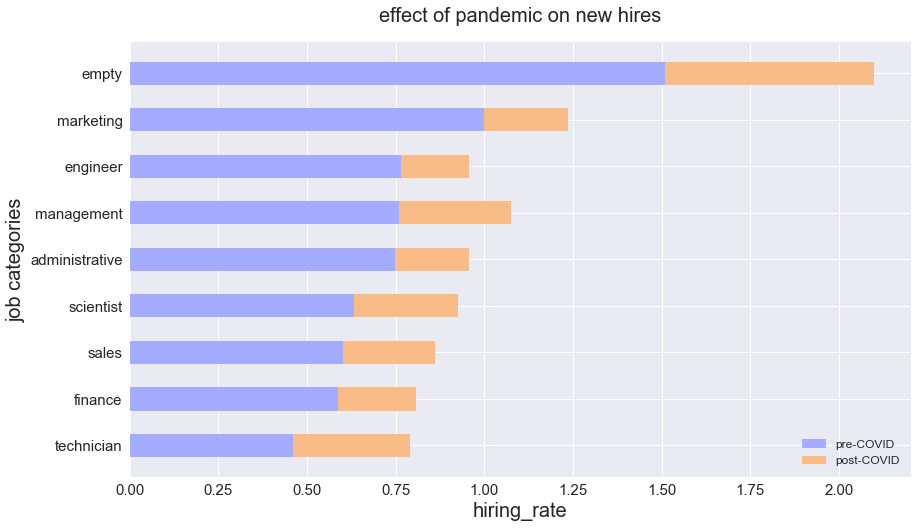

In [18]:
# At first I planned to compare hires as a share of total employees, but I realized that it's sensitive to 'count.'
# As a consequence of downsizing staff — our denominator — a company's hiring_rate might be artificially inflated.

stacked_bars('hiring_rate')

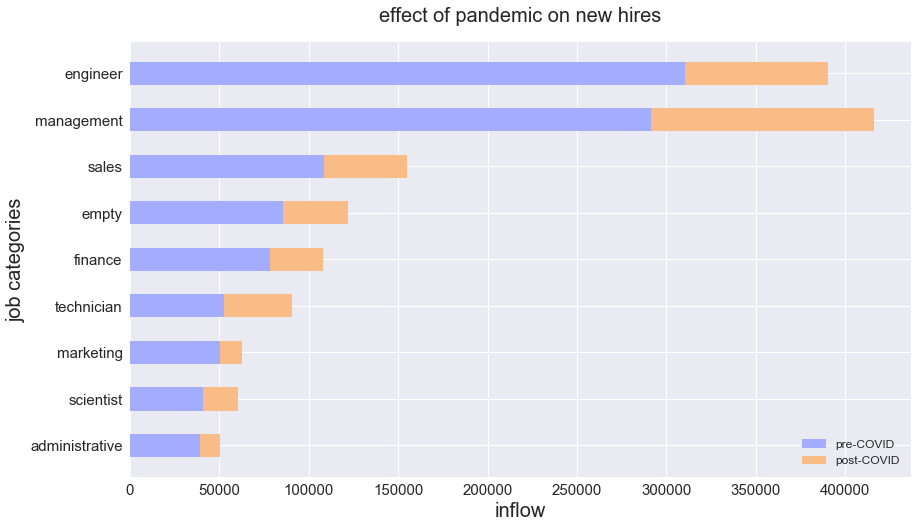

In [10]:
# Case in point: the 'empty' category indeed leads above, despite being only 5th of 9 in 'inflow.'
# This is because its 'count' is behind all but those of marketing & admin, suggesting count-ratios aren't reliable.

stacked_bars('inflow')

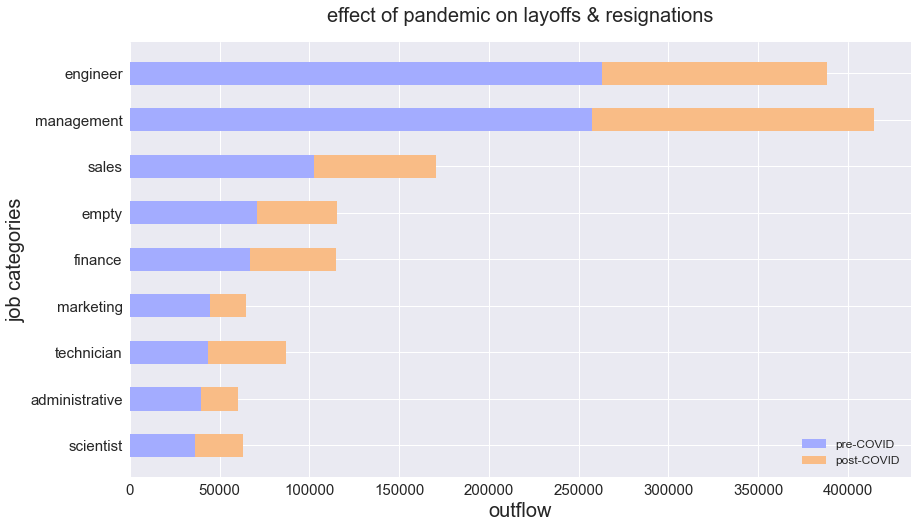

In [11]:
# Even the raw data, though, I found strange: Could the virus be the source of positive news across the board?
# Well, one possibility is that the higher outcomes are simply compensating for job losses, in which case both should be proportional.

stacked_bars('outflow')

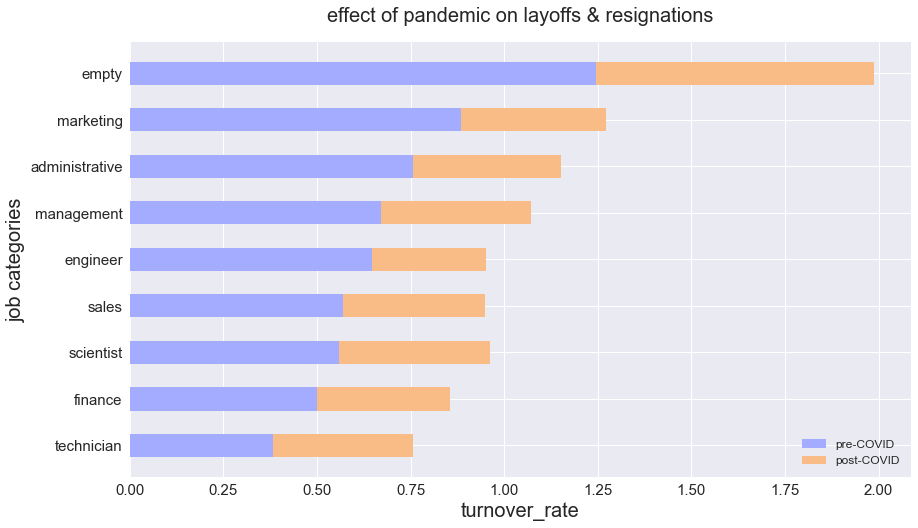

In [12]:
# Managers and engineers appear to have been fired in great numbers, explaining their later reinstitution.
# Likewise, scientists (1.7 of whom, surprisingly, were let go for each job lost last year) made up ground.

stacked_bars('turnover_rate')

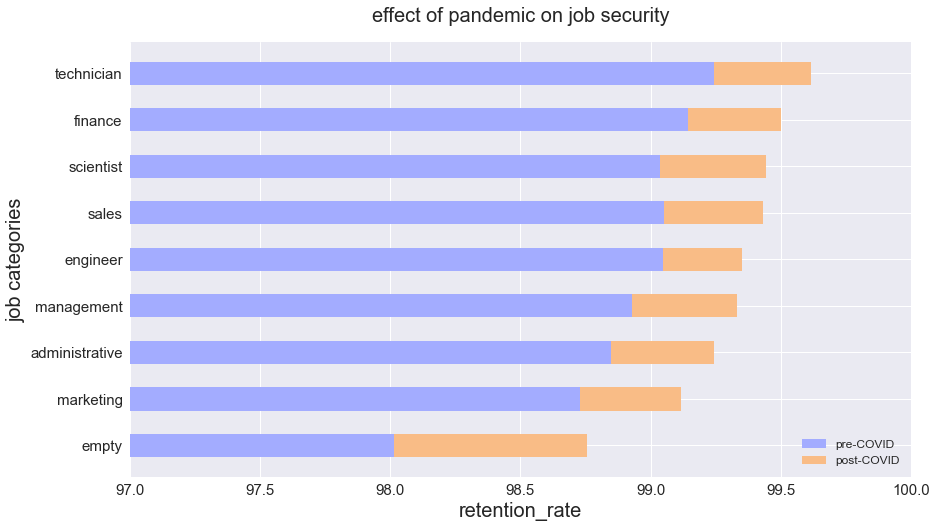

In [13]:
# Judging by 'hiring_rate,' 'inflow,' and 'outflow,' it feels like COVID had specific targets in mind, albeit boring ones.
# However, the turnover rate paints a different story: nearly uniform trends of more people forced out of all job categories.

stacked_bars('retention_rate')

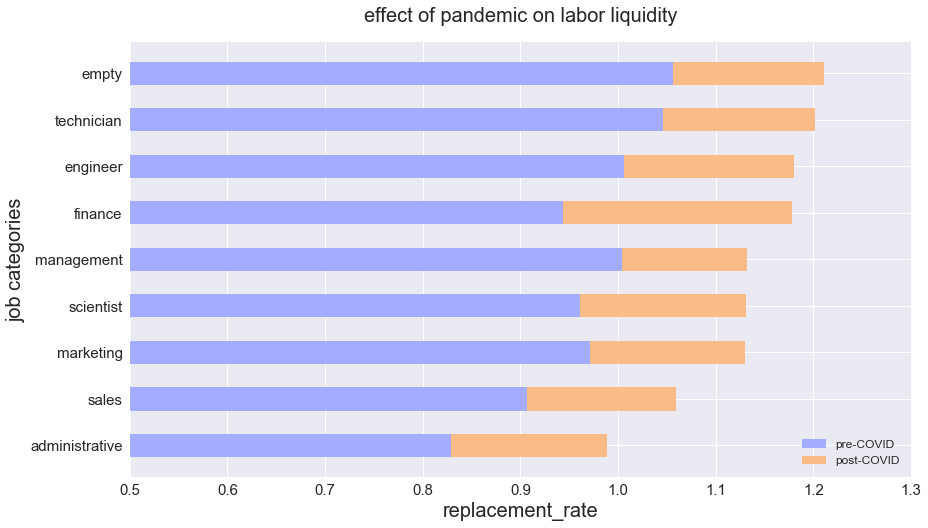

In [14]:
# This follows directly from turnover. In fact, the numerators of the two metrics add up to 100% of 'count.'
# Nonetheless, retention perhaps best illustrates the overall market stability, which makes these equal gains all the more curious.

stacked_bars('replacement_rate')

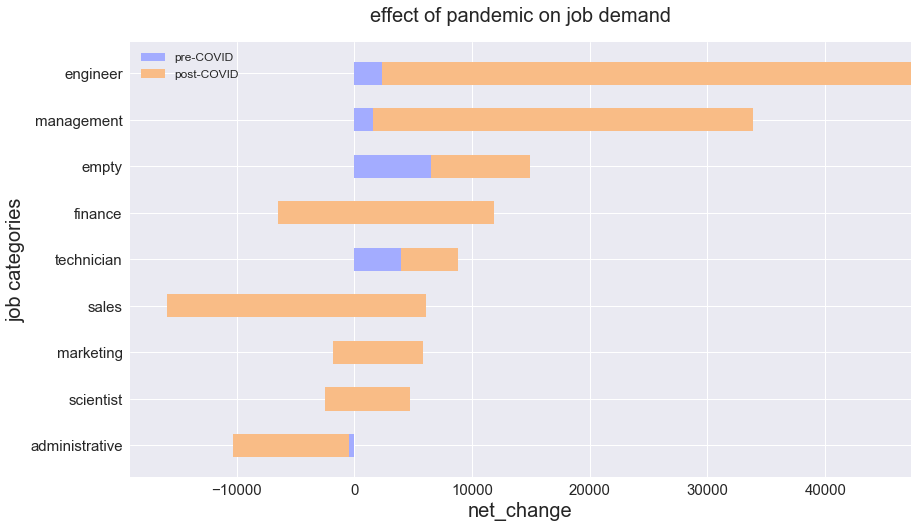

In [15]:
# There's still very little difference in the speeds at which companies are able to rehire! 
# So I subtracted employees who leave from those who join (both absolute measures) and plotted the result.

stacked_bars('net_change')

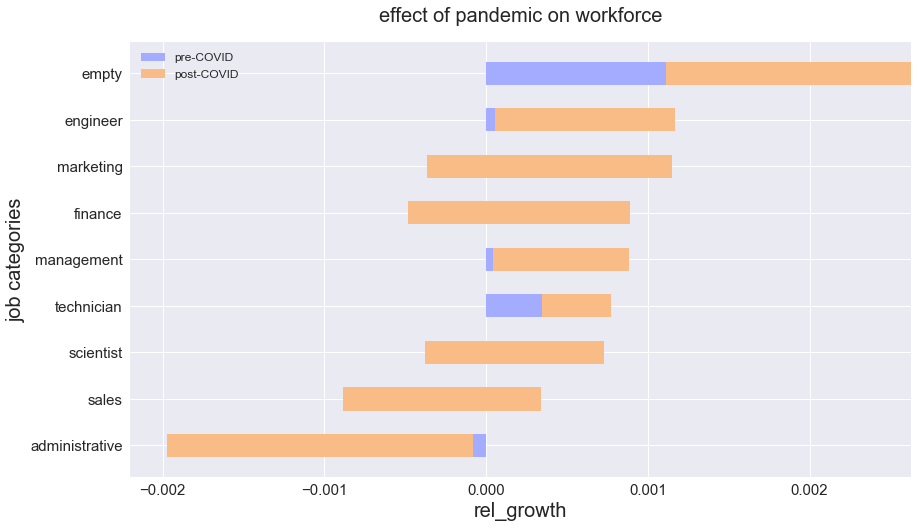

In [16]:
# Finally some diversity. As discussed earlier, demand for engineering & management skyrocketed post-COVID.
# Notably, four jobs that were net hiring not long ago actually saw a demand decline in response to the virus.

stacked_bars('rel_growth')

In [17]:
# This reintroduces our potentially flawed 'count' metric in order to gauge a percent change in personnel.
# Of all jobs, admin work is the only one headed in the wrong direction, at least in relative terms.
# Yet again, those in marketing, finance, scientist, and sales experienced a reversal of course due to COVID-19.